In [20]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import warnings
import math
import numpy as np
import seaborn as sns
from glob import glob

In [23]:
# Load data

measurement_dirs = glob(f"data/*/*")
measurement_dirs += glob(f"data_scale/*/*")
measurement_dirs += glob(f"data_scale_rampup/*/*")

measurement_dirs

['data_scale/baseline_vanilla_cpu/1',
 'data_scale/baseline_vanilla_cpu/0',
 'data_scale_rampup/baseline_vanilla_cpu/1',
 'data_scale_rampup/baseline_vanilla_cpu/0']

In [24]:
glob(f"{measurement_dirs[0]}/*")

['data_scale/baseline_vanilla_cpu/1/measurements_11_06_2024_20_33.csv',
 'data_scale/baseline_vanilla_cpu/1/values.yaml',
 'data_scale/baseline_vanilla_cpu/1/teastore_failures.csv',
 'data_scale/baseline_vanilla_cpu/1/teastore_stats_history.csv',
 'data_scale/baseline_vanilla_cpu/1/measurements_08_06_2024_19_49.csv',
 'data_scale/baseline_vanilla_cpu/1/measurements_07_06_2024_16_52.csv',
 'data_scale/baseline_vanilla_cpu/1/measurements_06_06_2024_09_50.csv',
 'data_scale/baseline_vanilla_cpu/1/erros.log',
 'data_scale/baseline_vanilla_cpu/1/teastore_stats.csv',
 'data_scale/baseline_vanilla_cpu/1/measurements_10_06_2024_11_45.csv',
 'data_scale/baseline_vanilla_cpu/1/experiment.json']

In [46]:
def measurement_file_to_df(file: str, prefix: str):
    # no risk, no fun
    (pr_scale, pr_branch, pr_run, pr_name) = pf.split("/")
    pod_df = pd.read_csv(file)
    pod_df["exp_workload"] = pr_scale
    pod_df["exp_branch"] = pr_branch
    pod_df["exp_run_i"] = pr_run
    pod_df["exp_run"] = pr_name.replace(prefix, "").replace(".csv", "")

    return pod_df


def get_df_for_prefix(prefix, measurement_dirs):

    pod_prefix = 
    pod_files = np.concatenate([glob(f"{d}/{prefix}*") for d in measurement_dirs])
    all_pods = pd.concat([measurement_file_to_df(pf, prefix) for pf in pod_files])
    return all_pods



In [50]:
all_nodes = get_df_for_prefix("measurements_node_", measurement_dirs)
all_nodes

,instance,observation_time,collection_time,cpu_usage,memory_usage,network_usage,wattage,num_processes,wattage_kepler,wattage_scaph,exp_workload,exp_branch,exp_run_i,exp_run
0,ise-kmaster,NaN,2024-06-12 11:08:58.986000,246.333333,2550.763520,0.601744,0,-1,0.000000,0.000000,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
1,ise-knode1,NaN,2024-06-12 11:08:58.986000,4775.333333,5226.139648,0.783110,0,-1,0.000603,0.057718,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
2,ise-knode3,NaN,2024-06-12 11:08:58.986000,42.330511,1459.650560,0.037001,0,-1,0.000000,0.000000,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
3,sm-gpu,NaN,2024-06-12 11:08:58.986000,114.666667,10127.421440,0.054693,42,-1,0.006326,14.126387,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
4,ise-knode2,NaN,2024-06-12 11:08:58.986000,81.333333,1555.546112,0.008891,0,-1,0.000000,0.000000,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,ise-knode1,NaN,2024-06-12 11:40:41.164000,326.333333,10744.008704,0.649100,0,-1,0.001692,0.000000,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
560,ise-knode3,NaN,2024-06-12 11:40:41.164000,40.000000,1464.197120,0.023616,0,-1,0.000000,0.000000,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
561,sm-gpu,NaN,2024-06-12 11:40:41.164000,318.000000,11032.543232,0.066997,44,-1,0.002888,14.807165,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24
562,ise-knode2,NaN,2024-06-12 11:40:41.164000,67.333333,1587.486720,0.005266,0,-1,0.000000,0.000000,data_scale_rampup,baseline_vanilla_cpu,0,measurements_pod_12_06_2024_11_24


In [49]:
# get all pod measurements

all_pods = get_df_for_prefix("measurements_pod_", measurement_dirs)
all_pods

,collection_time,observation_time,name,namespace,cpu_usage,memory_usage,network_usage,instance,process_wattage_kepler,process_wattage_scaph,exp_workload,exp_branch,exp_run_i,exp_run,wattage_kepler,wattage_scaph,wattage,num_processes
0,2024-06-12 17:21:32.250381,2024-06-12 17:21:32.250383,teastore-webui-0,tea-bench,0.000000,5.668864,NaN,unknown,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.000000,0.000000,NaN,NaN
1,2024-06-12 17:21:32.250389,2024-06-12 17:21:32.250389,teastore-db-0,tea-bench,0.000000,3.543040,NaN,unknown,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.000000,0.000000,NaN,NaN
2,2024-06-12 17:21:32.250393,2024-06-12 17:21:32.250394,teastore-persistence-0,tea-bench,0.000000,5.881856,NaN,unknown,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.000000,0.000000,NaN,NaN
3,2024-06-12 17:21:32.250398,2024-06-12 17:21:32.250398,unknown,tea-bench,0.000000,0.000000,NaN,unknown,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.000000,0.000021,NaN,NaN
4,2024-06-12 17:21:32.250407,2024-06-12 17:21:32.250408,teastore-registry-0,tea-bench,0.000000,5.242880,NaN,unknown,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,2024-06-12 11:40:41.204785,2024-06-12 11:40:41.185000,teastore-webui-0,tea-bench,37.458686,1232.760832,NaN,ise-knode1,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.120000,0.000000,NaN,NaN
1300,2024-06-12 11:40:41.204790,2024-06-12 11:40:41.185000,teastore-db-0,tea-bench,1.534162,106.627072,NaN,ise-knode1,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.071667,0.000000,NaN,NaN
1301,2024-06-12 11:40:41.204794,2024-06-12 11:40:41.185000,teastore-image-2,tea-bench,54.315653,1164.877824,NaN,ise-knode6,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,0.000000,0.000000,NaN,NaN
1302,2024-06-12 11:40:41.204799,2024-06-12 11:40:41.185000,teastore-webui-1,tea-bench,32.678030,898.723840,NaN,sm-gpu,NaN,NaN,data_scale_rampup,baseline_vanilla_cpu,0,12_06_2024_11_24,6.273333,0.000000,NaN,NaN


<Axes: >

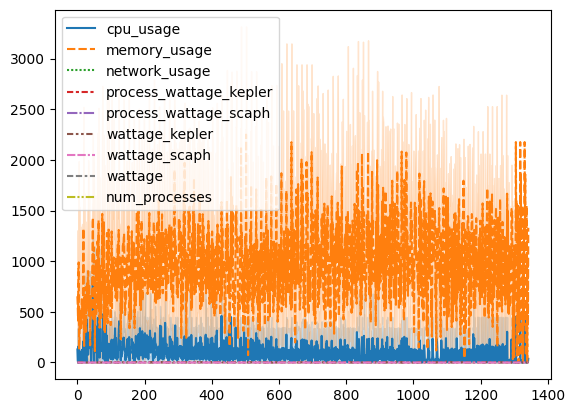

In [38]:
sns.lineplot(all_pods)